### Describe the dataset - Employee Earning Report 2017

Every year city of boston publish the payroll data of boston public services employees dataset contain their name , job title, base salary , total salary , department and postal code. There are total 22245 rows and 12 columns in this dataset which also contain the null values(Missing Values).

### Describe what question you intend to answer with the dataset

#### Questions Can be answered :
###### Which are the top 10 job title by salary.
###### Average Salary earned (top 10) by department
###### Which city has highest average salary earned
###### Top 10 employess by earnings.
###### Top 10 avergae departmnet earnings.
###### Average salary comparison 2016 vs 2017
###### Hypothesis testing to see overtime in 2017 was higher
###### 2016 vs 2017 average salary by department (top 10)
######  Visualizations to see coorelation between overtime and salary using scatterplot
######  Descriptive analysis about dataset

### Employee Earning 2017 Dataset has lot of Nan Values which I filled with zeros 
#### postal column there was some 'unknown' which I removed.
#### Dollar and comma removed.
#### I have rename the columns to make code handy and easier.
#### Employee earning whole data was in string object but for data analysis and better outcomes I have converted dataset into Numeric-Float64.
#### I have reset the Index 
#### I have only taken those columns which I want to peform the Analysis.
#### Below I have make the script  for data cleaning process to save the steps.

### Data Cleaning - Script which Contain below operations.
##### Import Data Link
##### Removed dollar and comma from total earning
#####  Added trailing zeros in postal code
##### Filled zeros with Nan values
##### Converted string to numeric
##### Rename the columns 
##### Drop columns which were not used for analysis
##### Remove 'Unknown' from postal
##### Reset the Index
##### Use head to show you the limitted data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
Salary_data = pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv')
Salary_data['TOTAL EARNINGS'] = Salary_data['TOTAL EARNINGS'].str.replace('$','').str.replace(',','')
Salary_data['OVERTIME'] = Salary_data['OVERTIME'].str.replace('$','').str.replace(',','').str.replace('(','').str.replace(')','')
Salary_data['POSTAL']=Salary_data['POSTAL'].apply(lambda x: '{0:0>5}'.format(x))
Salary_data['TOTAL EARNINGS'] = pd.to_numeric(Salary_data['TOTAL EARNINGS'])
Salary_data['OVERTIME'] = pd.to_numeric(Salary_data['OVERTIME']).fillna(0)
Salary_data.rename(columns={'NAME':'Employee_Full_Name','DEPARTMENT NAME':'Department_Name','TITLE':'Job_Designation','OVERTIME':'Overtime','TOTAL EARNINGS':'Total_Salary','POSTAL':'Postal'},inplace=True)
Salary_data.drop(['REGULAR','RETRO','OTHER','INJURED','DETAIL','QUINN/EDUCATION INCENTIVE'],axis=1,inplace=True)
Salary_data.drop( Salary_data[ (Salary_data['Postal'] == 'UNKNO') | (Salary_data['Postal'] == 'B1S 3')].index , inplace=True)
Salary_data.sort_values('Total_Salary',inplace=True, ascending=False)
Salary_data.reset_index(inplace=True,drop=True)
Salary_data.head(10)


,Employee_Full_Name,Department_Name,Job_Designation,Overtime,Total_Salary,Postal
0,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,62696.50,366232.65,02186
1,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,66066.69,341992.03,02135
2,"Lee,Waiman",Boston Police Department,Police Detective,71669.26,340176.42,02134
3,"Hasson,James G",Boston Police Department,Police Captain (Det),72158.26,320223.88,02125
4,"McCormick,Kelley J",Boston Police Department,Police Captain/DDC,63707.64,316673.79,02476
5,"Josey,Windell C.",Boston Police Department,Police Detective,87745.95,312156.35,02301
6,"Webb,Keith A",Boston Police Department,Police Sergeant (Det),75508.09,310697.42,02121
7,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,86243.95,306680.67,02186
8,"Danilecki,John H",Boston Police Department,Police Captain,48987.11,305571.00,02081
9,"King,Peter",Boston Police Department,Police Lieutenant (Det),26443.98,303145.11,02368


In [20]:
#What is the average of Total Salary.
Salary_data.loc[:,"Total_Salary"].mean()

71546.8332570501

In [11]:
#What is the maximum amount for salary
Salary_data.loc[:,"Total_Salary"].max()

366232.65

In [6]:
#What is the average of the Overtime.
Salary_data.loc[:,"Overtime"].mean()

4808.946110910879

In [10]:
# what is the maximum amount for overtime.
Salary_data.loc[:,"Overtime"].max()

144873.75

### Total Earning rename as Total Salary

#### Top 10 employess by highest salary.

In [12]:
Salary_data.sort_values('Total_Salary',ascending=False).head(10)

,Employee_Full_Name,Department_Name,Job_Designation,Overtime,Total_Salary,Postal
0,"Hosein,Haseeb",Boston Police Department,Police Captain/DDC,62696.50,366232.65,02186
1,"Kervin,Timothy M.",Boston Police Department,Police Lieutenant/Hdq Dispatch,66066.69,341992.03,02135
2,"Lee,Waiman",Boston Police Department,Police Detective,71669.26,340176.42,02134
3,"Hasson,James G",Boston Police Department,Police Captain (Det),72158.26,320223.88,02125
4,"McCormick,Kelley J",Boston Police Department,Police Captain/DDC,63707.64,316673.79,02476
5,"Josey,Windell C.",Boston Police Department,Police Detective,87745.95,312156.35,02301
6,"Webb,Keith A",Boston Police Department,Police Sergeant (Det),75508.09,310697.42,02121
7,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,86243.95,306680.67,02186
8,"Danilecki,John H",Boston Police Department,Police Captain,48987.11,305571.00,02081
9,"King,Peter",Boston Police Department,Police Lieutenant (Det),26443.98,303145.11,02368


#### TOP 10 average departmnets by  total salary.

In [13]:
x=Salary_data.groupby('Department_Name').mean().sort_values('Total_Salary',ascending=False).head(10)
print(x)

                                   Overtime   Total_Salary
Department_Name                                           
Boston Fire Department         13588.839238  128069.831476
Boston Police Department       21278.935744  124302.513313
Asst Superintendent-Network A      0.000000  122962.039286
Strategy Department                0.000000  118549.330000
Chief Operating Officer            0.000000  107889.791429
Superintendent                     0.000000  105557.351250
Chief Financial Officer            0.000000  101583.576875
Accountability                     0.000000   97531.927692
BPS Facility Mgmt/A & R         7813.374286   95241.828776
Chief of Staff                     0.000000   93819.775000


#### TOP 10 average departmnets by total salary.

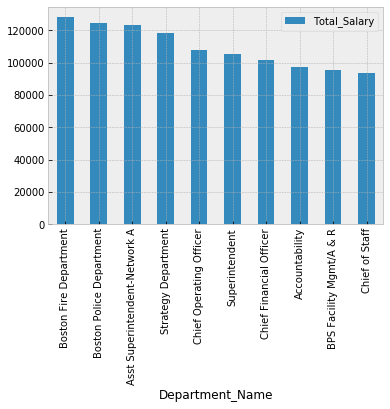

In [10]:
Salary_data_filtered=Salary_data.drop(['Overtime'],axis=1)
Salary_data_filtered.groupby('Department_Name').mean().sort_values('Total_Salary',ascending=False)[:10].plot(kind='bar')

#### Top 10 avergae salary paid by designation.

In [154]:
Salary_data.groupby('Job_Designation').mean().sort_values('Total_Salary',ascending=False).head(10)

,Overtime,Total_Salary
Job_Designation,,
Police Sergeant/Hdq Dispatcher,75513.010000,298649.880000
Police Lieutenant/Hdq Dispatch,72018.733333,284971.610000
Police Lieut/Paid Detail Ser,70623.270000,276210.510000
Superintendent,0.000000,270660.710000
Police Captain-DDC/HRCD,31032.190000,268218.280000
Police Captain,48967.770000,267461.527500
Police Lieut (Det),53563.860000,260380.540000
Police Captain (Det),46450.106667,259803.513333
Police Captain/DDC,52622.501875,257755.017500


#### Top 10 avergae salary paid by designation.

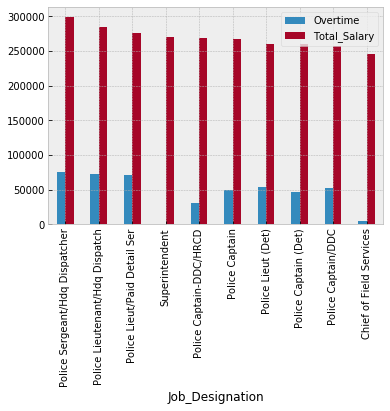

In [12]:
Salary_data.groupby('Job_Designation').mean().sort_values('Total_Salary',ascending=False)[:10].plot(kind='bar')

#### Departmnet wise Top 10 job designation.

In [4]:
Salary_data.groupby(['Department_Name','Job_Designation'])['Total_Salary'].mean().head(5)

Department_Name      Job_Designation             
ASD Human Resources  Admin Asst                      61622.10
                     Assistant Compliance Manager    59536.15
                     Assoc Dir (EAP)                 91318.35
                     Associate HRIS Manager          61913.07
                     Benefits HRIS Manager           36714.80
Name: Total_Salary, dtype: float64

#### Which city has maximum or highest salary in 2017.

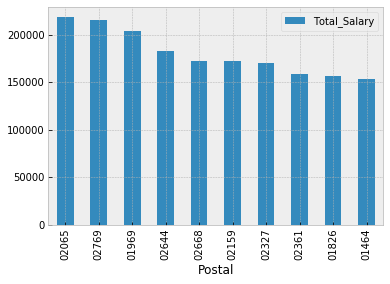

In [14]:
Salary_data_filtered.groupby('Postal').mean().sort_values('Total_Salary',ascending=False)[:10].plot(kind='bar')

#### Total Salary vs Overtime Relationship - Scatterplot
#### Taken total salary who earned less than 50000

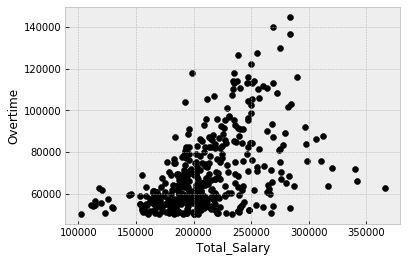

In [27]:
import matplotlib.pyplot as plt
Salary_filtered_data = Salary_data[Salary_data['Overtime']>50000]


x=Salary_filtered_data.Total_Salary
y=Salary_filtered_data.Overtime
plt.scatter(x,y,label='Scatterplot',color='k')
plt.xlabel('Total_Salary')
plt.ylabel('Overtime')
plt.show()


#### Boxplot - Total Earning (Rename Total_Salary)

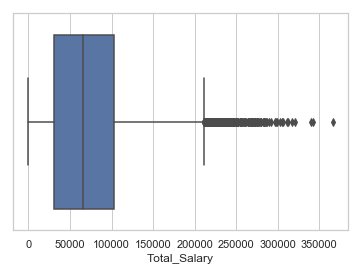

In [35]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=Salary_data["Total_Salary"])

### The above boxplot give you the graphical representation of total salary in terms of median, outliers and quartilewise.

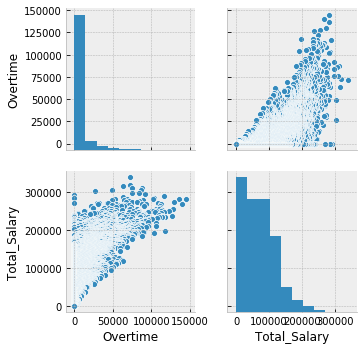

In [14]:
sns.pairplot(Salary_data.loc[:,Salary_data.dtypes == 'float64'])

C:\Users\Manish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


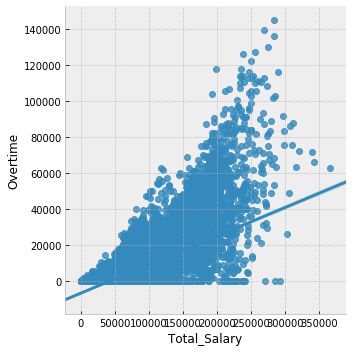

In [8]:
Salary_filtered_data = Salary_data[Salary_data['Total_Salary']>260000]
x = sns.lmplot(x="Total_Salary", y="Overtime",  data=Salary_data)

## Here , I have merge two dataset Employee Earning Report 2017 and Employee Eraning Repot 2016 to analysis the diffrence between the Total earning (Total_Salary) and other parameter like overtime.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
Salary_data_2017 = pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv')
Salary_data_2017['TOTAL EARNINGS'] = Salary_data_2017['TOTAL EARNINGS'].str.replace('$','').str.replace(',','')
Salary_data_2017['OVERTIME'] = Salary_data_2017['OVERTIME'].str.replace('$','').str.replace(',','').str.replace('(','').str.replace(')','')
Salary_data_2017['POSTAL']=Salary_data_2017['POSTAL'].apply(lambda x: '{0:0>5}'.format(x))
Salary_data_2017['TOTAL EARNINGS'] = pd.to_numeric(Salary_data_2017['TOTAL EARNINGS'])
Salary_data_2017['OVERTIME'] = pd.to_numeric(Salary_data_2017['OVERTIME']).fillna(0)
Salary_data_2017.rename(columns={'DEPARTMENT NAME':'Department_Name','TITLE':'Job_Designation','TOTAL EARNINGS':'Total_Salary','POSTAL':'Postal','OVERTIME':'Overtime'},inplace=True)
Salary_data_2017.drop(['REGULAR','RETRO','OTHER','INJURED','DETAIL','QUINN/EDUCATION INCENTIVE','NAME'],axis=1,inplace=True)
Salary_data_2017.drop( Salary_data_2017[ (Salary_data_2017['Postal'] == 'UNKNO') | (Salary_data_2017['Postal'] == 'B1S 3')].index , inplace=True)
Salary_data_2017.sort_values('Total_Salary',inplace=True, ascending=False)
Salary_data_2017.reset_index(inplace=True,drop=True)
Salary_data_2017['Year'] = '2017'
Salary_data_2017.head(10)

,Department_Name,Job_Designation,Overtime,Total_Salary,Postal,Year
0,Boston Police Department,Police Captain/DDC,62696.50,366232.65,02186,2017
1,Boston Police Department,Police Lieutenant/Hdq Dispatch,66066.69,341992.03,02135,2017
2,Boston Police Department,Police Detective,71669.26,340176.42,02134,2017
3,Boston Police Department,Police Captain (Det),72158.26,320223.88,02125,2017
4,Boston Police Department,Police Captain/DDC,63707.64,316673.79,02476,2017
5,Boston Police Department,Police Detective,87745.95,312156.35,02301,2017
6,Boston Police Department,Police Sergeant (Det),75508.09,310697.42,02121,2017
7,Boston Police Department,Police Captain/DDC,86243.95,306680.67,02186,2017
8,Boston Police Department,Police Captain,48987.11,305571.00,02081,2017
9,Boston Police Department,Police Lieutenant (Det),26443.98,303145.11,02368,2017


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
Salary_data_2016 = pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/8368bd3d-3633-4927-8355-2a2f9811ab4f/download/employee-earnings-report-2016.csv',encoding='latin-1')
Salary_data_2016['TOTAL EARNINGS'] = Salary_data_2016['TOTAL EARNINGS'].str.replace('$','').str.replace(',','')
Salary_data_2016['TOTAL EARNINGS'] = pd.to_numeric(Salary_data_2016['TOTAL EARNINGS'])
Salary_data_2016['OVERTIME'] = Salary_data_2016['OVERTIME'].str.replace('$','').str.replace(',','').str.replace('(','').str.replace(')','')
Salary_data_2016['OVERTIME'] = pd.to_numeric(Salary_data_2016['OVERTIME']).fillna(0)
Salary_data_2016.rename(columns={'DEPARTMENT_NAME':'Department_Name','TITLE':'Job_Designation','TOTAL EARNINGS':'Total_Salary','POSTAL':'Postal','OVERTIME':'Overtime'},inplace=True)
Salary_data_2016.drop(['REGULAR','RETRO','OTHER','INJURED','DETAIL','QUINN/EDUCATION INCENTIVE','NAME'],axis=1,inplace=True)
Salary_data_2016.sort_values('Total_Salary',inplace=True, ascending=False)
Salary_data_2016.reset_index(inplace=True,drop=True)
Salary_data_2016['Year'] = '2016'
#Salary_data_2016['Year'] = pd.to_numeric(Salary_data_2016['Year'])
Salary_data_2016.fillna(value=0,inplace=True)
Salary_data_2016.head(10)

,Department_Name,Job_Designation,Overtime,Total_Salary,Postal,Year
0,Boston Police Department,Police Detective,58600.49,403408.61,02134,2016
1,Boston Police Department,Police Detective,89610.71,396348.50,02301,2016
2,Boston Police Department,Police Detective,82482.12,373959.35,02081,2016
3,Boston Police Department,Police Detective,87511.88,351825.50,02301,2016
4,Boston Police Department,Police Captain/DDC,50719.02,346105.17,02186,2016
5,Boston Police Department,Police Lieutenant/Hdq Dispatch,87167.66,343818.16,02135,2016
6,Boston Police Department,Police Detective,104566.57,339367.10,02132,2016
7,Boston Police Department,Police Detective,68946.58,323485.97,02081,2016
8,Boston Police Department,Police Detective,74914.80,317703.38,02302,2016
9,Boston Police Department,Police Captain,52296.08,315750.29,02081,2016


#### Concanate dataset year 2016 & year 2017

In [30]:
Salary_by_year=pd.concat([Salary_data_2017,Salary_data_2016])

Salary_by_year.head()

,Department_Name,Job_Designation,Overtime,Total_Salary,Postal,Year
0,Boston Police Department,Police Captain/DDC,62696.50,366232.65,02186,2017
1,Boston Police Department,Police Lieutenant/Hdq Dispatch,66066.69,341992.03,02135,2017
2,Boston Police Department,Police Detective,71669.26,340176.42,02134,2017
3,Boston Police Department,Police Captain (Det),72158.26,320223.88,02125,2017
4,Boston Police Department,Police Captain/DDC,63707.64,316673.79,02476,2017


#### Use descriptive analytics to comapre the results for 2016 and 2017 between Overtime vs Total salary.

In [24]:
Salary_by_year.describe()

,Overtime,Total_Salary
count,44244.000000,44244.000000
mean,4670.236911,71612.125735
std,12044.466964,51492.224851
min,-484.120000,2.140000
25%,0.000000,30220.047500
50%,0.000000,66130.645000
75%,1474.702500,103224.405000
max,144873.750000,403408.610000


#### Aevrage salary earned in 2016 was bit higher than 2017 based on below graph

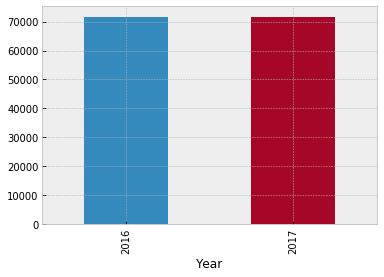

In [35]:
# 2016 vs 2017 avrege salary earned 
Salary_by_year.groupby('Year')['Total_Salary'].mean().sort_values(ascending=False).plot(kind='bar')

#### Based on below graph data Asst Superitendant-Network A is the highest paid department in 2016 vs Boston Fire Department in 2017

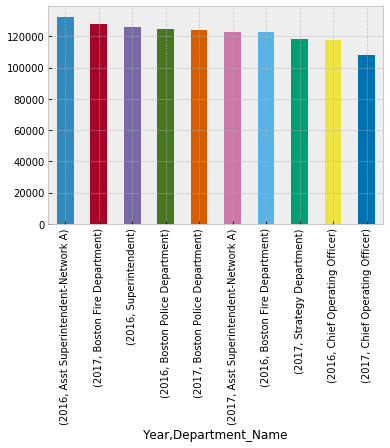

In [26]:
# Average salary earned within department in 2016 vs 2017
Salary_by_year.groupby(['Year', 'Department_Name'])['Total_Salary'].mean().sort_values(ascending=False)[:10].plot(kind='bar')

#### As you can see from below graph in yaer 2016 'Teacher Designation' was one of the higest paying job.

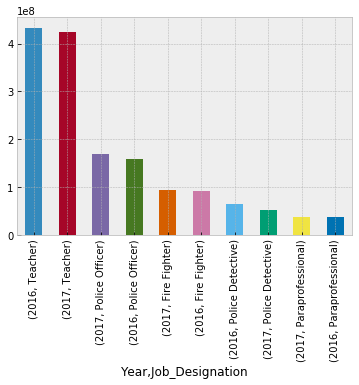

In [27]:
Salary_by_year.groupby(['Year', 'Job_Designation'])['Total_Salary'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
#plt.show()

#### Here I have used the statmodel library which provide estimation of many different statistical models.

C:\Users\Manish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


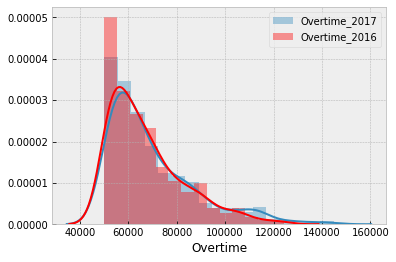

In [96]:
# Below analysis is to test whether salary earned in 2017 was more than 2016.
import statsmodels
import statsmodels.stats as stats

Salary_filtered=Salary_by_year[Salary_by_year['Overtime']>50000]
Overtime_2017 = Salary_filtered.loc[Salary_filtered['Year']=='2017', 'Overtime']
Overtime_2016 = Salary_filtered.loc[Salary_filtered['Year']=='2016', 'Overtime']


sns.distplot(Overtime_2017)
sns.distplot(Overtime_2016, color='red')
plt.legend(['Overtime_2017', 'Overtime_2016'])

In [98]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(Overtime_2017,Overtime_2016, alternative='larger')

(1.9336363833617858, 0.02676542136284245, 756.0)

### Correlation between the two dataset

In [99]:
Salary_by_year.corr()

,Overtime,Total_Salary
Overtime,1.00000,0.64678
Total_Salary,0.64678,1.00000


#### CONCLUSION :

Based on the above distribution we can say there is slight diffrence in total salary is greater than in year 2017 as comare to year 2016.P value is 0.026 which is less than alpha value which is 0.05 so here we reject the null hypothesis and can say that overtime amount is higher as comapre to year 2016  and corelation is 0.64678.

In [82]:
# Descriptive AnalyticsOvertime
Salary_filtered_data=Salary_data[Salary_data['Overtime'] > 50000]
Salary_filtered_data.describe(include='all')

,Employee_Full_Name,Department_Name,Job_Designation,Overtime,Total_Salary,Postal
count,418,418,418,418.000000,418.000000,418
unique,418,5,58,NaN,NaN,100
top,"Brown,John M",Boston Police Department,Police Detective,NaN,NaN,02132
freq,1,380,113,NaN,NaN,46
mean,NaN,NaN,NaN,69684.019474,210443.483086,NaN
std,NaN,NaN,NaN,18104.761778,38654.761762,NaN
min,NaN,NaN,NaN,50043.320000,102064.320000,NaN
25%,NaN,NaN,NaN,56493.857500,187453.185000,NaN
50%,NaN,NaN,NaN,64031.770000,205748.695000,NaN
75%,NaN,NaN,NaN,78442.385000,234328.150000,NaN


In [83]:
import matplotlib.pyplot as plt
Salary_filtered_data.corr()

,Overtime,Total_Salary
Overtime,1.000000,0.483846
Total_Salary,0.483846,1.000000


In [84]:
# Linear Model - Overtime as function of Total_Salary
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('Total_Salary ~ Overtime', data = Salary_filtered_data).fit()
print(results.params)
results.summary()

Intercept    138457.135263
Overtime          1.033040
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Salary   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     127.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           6.47e-26
Time:                        23:25:38   Log-Likelihood:                -4952.0
No. Observations:                 418   AIC:                             9908.
Df Residuals:                     416   BIC:                             9916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.385e+05   6595.268     20.993      0.000    1.25e+05    1.51e+05
Overtime       1.0330      0.092     11.276      0.000       0.853       1.213
==============================================================================
Omnibus:                       71.986   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.629
Skew:                           0.885   Prob(JB):                     1.78e-36
Kurtosis:                       5.514   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Manish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


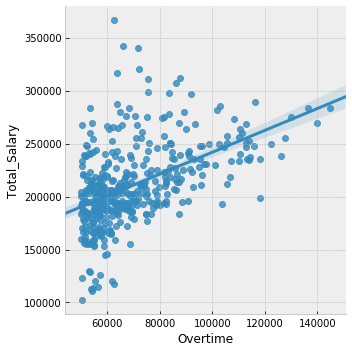

In [85]:
sns.lmplot(x='Overtime', y='Total_Salary', data=Salary_filtered_data)

In [100]:
from patsy import dmatrices
y,X = dmatrices('Total_Salary ~ Overtime', data=Salary_filtered_data)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))

y:(418, 1)
X:(418, 2)


In [101]:
X[0:10, :]

array([[1.000000e+00, 6.269650e+04],
       [1.000000e+00, 6.606669e+04],
       [1.000000e+00, 7.166926e+04],
       [1.000000e+00, 7.215826e+04],
       [1.000000e+00, 6.370764e+04],
       [1.000000e+00, 8.774595e+04],
       [1.000000e+00, 7.550809e+04],
       [1.000000e+00, 8.624395e+04],
       [1.000000e+00, 7.551301e+04],
       [1.000000e+00, 8.360745e+04]])

In [102]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X, y)

### Here I have predicated the Total salary vs actual salary

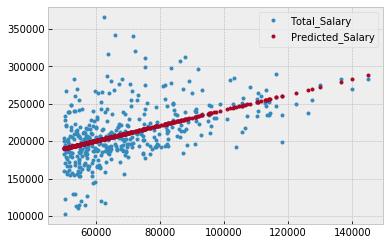

In [103]:
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['Total_Salary', 'Predicted_Salary'])

#### its liner model which shows salary as increases as overtime incresaes.

C:\Users\Manish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


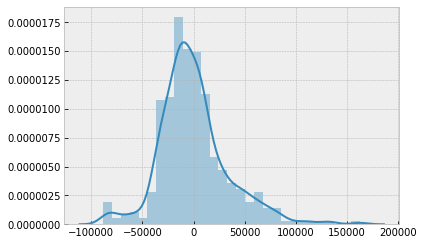

In [104]:
sns.distplot(y - model.predict(X))

##### As you can see from above graph here there comapretively less residuals in  this model. 

### Conclusion
According to my analysis based on descriptive staticis and data visulization Boston police department has the highest salary earned in year 2017. average salary earned in 2017 is slighly higher as comapre to 2016 and also we see the positive correlation between overtime and salary.
Hypothesis Testing : Based on the hypothesis t test we were able to claim that  average overtime wa greater in 2017 as comapre to year 2016.
Boston police department was having highest average salary earned however in 2016 it was Asst Superitendant-Network and also there was a marginal difference in 2016 vs 2017 in terms of average salary earned. Secondly, based on analysis on postal code we found "02065" city was leading in terms of average salary earned in 2017.Police seargent title has earned average highest salary in 2017 and last but not least a positive correlation was observed between overtime and total salary.